Stock Winning Streaks.  
python version of `stock_winning_streaks.R`

In [2]:
!python --version

Python 3.7.15


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

In [5]:
# read in data
uploaded = files.upload()

Saving mcd_stock_price.csv to mcd_stock_price.csv


In [ ]:
# check uploaded file
print(f"mcd_stock_price.csv sample: {uploaded['train.csv'][0:10]}")

In [77]:
# check file
print(f"mcd_stock_price.csv sample: {uploaded['mcd_stock_price.csv'][0:10]}")

mcd_stock_price.csv sample: b'"";"symbol'


In [78]:
df = pd.read_csv("mcd_stock_price.csv", sep=";")
df = df.drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(2726, 8)


,symbol,date,open,high,low,close,volume,adjusted
0,MCD,2012-01-03,"101,330002","101,589996","98,75","98,839996",8895900,"73,221718"
1,MCD,2012-01-04,"99,110001","100,300003","98,760002","99,389999",6754700,"73,62915"
2,MCD,2012-01-05,"99,470001","100,400002","98,68","99,830002",8163800,"73,955116"
3,MCD,2012-01-06,"100,089996","100,769997","99,870003","100,599998",6775300,"74,525528"
4,MCD,2012-01-09,"100,879997","100,93","99,510002","99,639999",4433700,"73,814354"


In [79]:
df = df.replace(',','.', regex=True)
df.head()

,symbol,date,open,high,low,close,volume,adjusted
0,MCD,2012-01-03,101.330002,101.589996,98.75,98.839996,8895900,73.221718
1,MCD,2012-01-04,99.110001,100.300003,98.760002,99.389999,6754700,73.62915
2,MCD,2012-01-05,99.470001,100.400002,98.68,99.830002,8163800,73.955116
3,MCD,2012-01-06,100.089996,100.769997,99.870003,100.599998,6775300,74.525528
4,MCD,2012-01-09,100.879997,100.93,99.510002,99.639999,4433700,73.814354


In [80]:
# change to numeric
df['open'] = pd.to_numeric(df['open'], errors='coerce')
df['high'] = pd.to_numeric(df['high'], errors='coerce')
df['low'] = pd.to_numeric(df['low'], errors='coerce')
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')
df['adjusted'] = pd.to_numeric(df['adjusted'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   symbol    2726 non-null   object 
 1   date      2726 non-null   object 
 2   open      2726 non-null   float64
 3   high      2726 non-null   float64
 4   low       2726 non-null   float64
 5   close     2726 non-null   float64
 6   volume    2726 non-null   float64
 7   adjusted  2726 non-null   float64
dtypes: float64(6), object(2)
memory usage: 170.5+ KB


In [81]:
df['up'] = df['close'].diff().fillna(0) > 0

s = df['up']

df['streak'] = (s
                 .mul(s.cumsum())
                 .diff()
                 .where(lambda x: x <0)
                 .ffill()
                 .add(s.cumsum(), fill_value=0))

df.head(10)

,symbol,date,open,high,low,close,volume,adjusted,up,streak
0,MCD,2012-01-03,101.330002,101.589996,98.750000,98.839996,8895900.0,73.221718,False,0.0
1,MCD,2012-01-04,99.110001,100.300003,98.760002,99.389999,6754700.0,73.629150,True,1.0
2,MCD,2012-01-05,99.470001,100.400002,98.680000,99.830002,8163800.0,73.955116,True,2.0
3,MCD,2012-01-06,100.089996,100.769997,99.870003,100.599998,6775300.0,74.525528,True,3.0
4,MCD,2012-01-09,100.879997,100.930000,99.510002,99.639999,4433700.0,73.814354,False,0.0
5,MCD,2012-01-10,100.239998,100.449997,99.349998,99.699997,5075400.0,73.858818,True,1.0
6,MCD,2012-01-11,99.620003,100.110001,99.349998,99.930000,4622500.0,74.029198,True,2.0
7,MCD,2012-01-12,100.370003,100.650002,100.070000,100.570000,4022700.0,74.503319,True,3.0
8,MCD,2012-01-13,100.180000,100.430000,99.610001,100.349998,4134800.0,74.340355,False,0.0
9,MCD,2012-01-17,100.589996,101.199997,100.050003,100.550003,4555800.0,74.488495,True,1.0


Now we plot the probability distribution of conesecutive days of increasing share price.

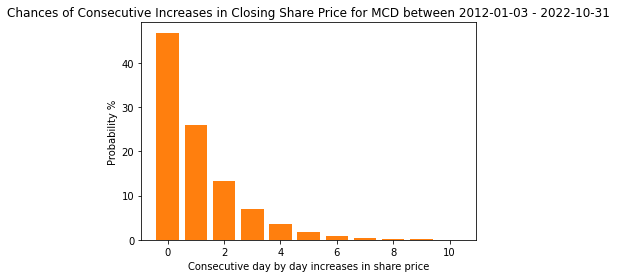

In [87]:
# bar plot of the data
plt.close()

streak_counts=(df
                  ['streak']
                  .value_counts(normalize=True)
                  .mul(100)
                  .round(1)
                  )
stock_name = df["symbol"][0]
min_date = df.loc[df.index[0], "date"]
max_date = df.loc[df.index[-1], "date"]

x = streak_counts.index
y = streak_counts.values

fig, ax = plt.subplots()
bar_obj = ax.bar(x=x, height=y)

_ = plt.bar(x, height=y)
_ = plt.xlabel("Consecutive day by day increases in share price")
_ = plt.ylabel("Probability %")
_ = plt.title(f"Chances of Consecutive Increases in Closing Share Price for {stock_name} between {min_date} - {max_date}")